In [184]:
import warnings
import time
import datetime
import sys
import numpy as np

from matplotlib import cm, pyplot as plt
import matplotlib.dates as dates
from matplotlib.lines import Line2D
from hmmlearn import hmm

import random
import pandas as pd
from scipy import stats
from sklearn import preprocessing

pd.options.mode.use_inf_as_na = True

In [2]:
df = pd.read_csv('SP500.csv')

In [3]:
date_list = pd.to_datetime(df['Date'])
volume_list = df['Volume']
open_list = df['Volume']
close_list = df['Close']

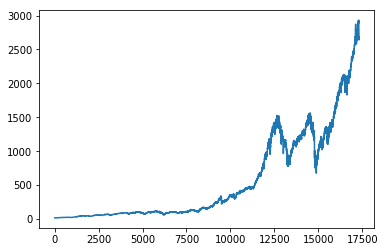

In [4]:
plt.plot(close_list)

In [412]:
rise_or_drop = []

for i in range(0,17319):
    if feature_1[i] > 0: 
        rise_or_drop.append(1)
    else: rise_or_drop.append(-1)
        

In [145]:
rise_or_drop = pd.DataFrame(list(zip(rise_or_drop)), 
             columns = ['Rise or Drop'],
            index = np.arange(1,17320,1))

In [198]:
test1 = rise_or_drop[17200:17321]

In [199]:
x = np.arange(17200,17319,1)

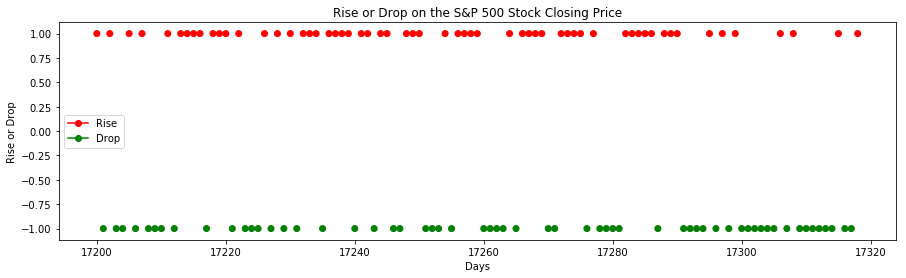

In [200]:
plt.figure(figsize=(15,4))
plt.title("Rise or Drop on the S&P 500 Stock Closing Price")
color= ['red' if i == 1 else 'green' for i in test1]
plt.scatter(x,test1,c=color,label=label)
plt.xlabel("Days")
plt.ylabel("Rise or Drop")
legend_elements = [Line2D([0], [0], color='r',marker='o',label='Rise'),
                   Line2D([0], [0], color='g',marker='o', label='Drop')]
plt.legend(handles=legend_elements,loc="center left")
plt.show()

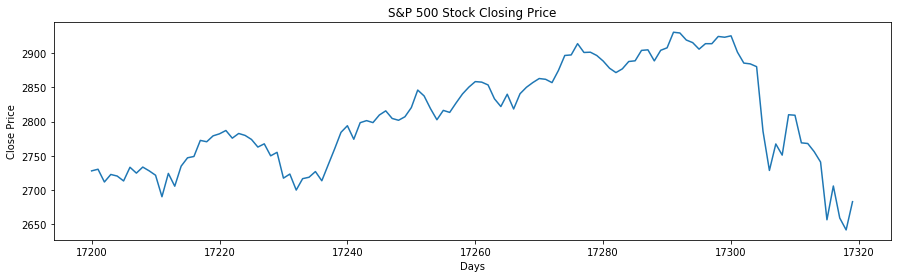

In [188]:
plt.figure(figsize=(15,4))
plt.plot(close_list[17200:17321])
plt.title("S&P 500 Stock Closing Price")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.show()

In [56]:
# feature 1
# everyday's closing prices' difference in percentage 
feature_1=np.diff(close_list)/close_list[:-1]

In [205]:
# feature 2
# everyday's volume
feature_2=volume_list[1:]

In [431]:
x=np.c_[feature_1,feature_2]
x.shape

(17319, 2)

In [432]:
train = x[0:13669]
test = x[13670:17320]

In [434]:
test

array([[ 1.76854979e-03,  1.46900000e+09],
       [-6.72299342e-03,  1.50930000e+09],
       [-1.37254725e-02,  1.65360000e+09],
       ...,
       [-1.73272641e-02,  4.80315000e+09],
       [-6.55959942e-03,  4.67370000e+09],
       [ 1.56667801e-02,  5.10638000e+09]])

In [214]:
# build HMM model
from hmmlearn.hmm import GaussianHMM
model_10=GaussianHMM(n_components=10,n_iter=1000,covariance_type='full') # 10 hidden states
model_3=GaussianHMM(n_components=3,n_iter=1000,covariance_type='full') # 3 hidden states

In [215]:
model_10 = model_10.fit(train)
model_3 = model_3.fit(train)

In [419]:
# most likely state sequence corresponding to dataset
hidden_states_10 = model_10.predict(train)
hidden_states_3 = model_3.predict(train)

In [217]:
# 10 hidden states
# set a week as a observation window

In [444]:
# 10 hidden states
# set a week as a observation window
past_likelihood = []

for i in range(0,3645,1):
    past_likelihood = np.append(past_likelihood, model_10.score((test[i:i + 5])))

In [445]:
past_likelihood = past_likelihood.tolist()

In [446]:
past_similar = []
curr_likelihood_list = []
likelihood_diff_idx_1 = []

for i in range(0,3645,1):
    curr_likelihood = model_10.score(test[i:i+5])
    likelihood_diff_idx = np.argmin(np.absolute((past_likelihood[:i]+past_likelihood[i+1:]) - curr_likelihood))
    likelihood_diff_idx_1.append(likelihood_diff_idx)
    past_similar.append(train[likelihood_diff_idx + 1][0])
    curr_likelihood_list.append(curr_likelihood)

In [447]:
predict_change = list(reversed(past_similar))

In [448]:
rise_or_drop_2 = []

for i in range(0,13663):
    if predict_change[i] > 0: 
        rise_or_drop_2.append(1)
    else: rise_or_drop_2.append(-1)

IndexError: list index out of range

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
rise_or_drop_1 = rise_or_drop[0:13663]

In [ ]:
train_result = confusion_matrix(rise_or_drop_1,rise_or_drop_2)

In [ ]:
accuracy1=(train_result[0,0]+train_result[1,1])/sum(sum(train_result))
sensitivity1 = train_result[0,0]/(train_result[0,0]+train_result[0,1])
specificity1 = train_result[1,1]/(train_result[1,0]+train_result[1,1])

print("The Score of Training set by 10-HMM prediction is ", accuracy1)
print("The Sensitivity of Training set by 10-HMM prediction is ", sensitivity1)
print("The Specificity of Training set by 10-HMM prediction is ", specificity1)

In [420]:
# 3 hidden states
# set a week as a observation window
past_likelihood = []

for i in range(0,13663,1):
    past_likelihood = np.append(past_likelihood, model_3.score((train[i:i + 5])))

In [421]:
past_likelihood = past_likelihood.tolist()

In [423]:
past_similar = []
curr_likelihood_list = []
likelihood_diff_idx_1 = []

for i in range(0,13663,1):
    curr_likelihood = model_3.score(train[i:i+5])
    likelihood_diff_idx = np.argmin(np.absolute((past_likelihood[:i]+past_likelihood[i+1:]) - curr_likelihood))
    likelihood_diff_idx_1.append(likelihood_diff_idx)
    past_similar.append(train[likelihood_diff_idx + 1][0])
    curr_likelihood_list.append(curr_likelihood)

In [440]:
predict_change = list(reversed(past_similar))

In [425]:
rise_or_drop_2 = []

for i in range(0,13663):
    if predict_change[i] > 0: 
        rise_or_drop_2.append(1)
    else: rise_or_drop_2.append(-1)

train_result = confusion_matrix(rise_or_drop_1,rise_or_drop_2)

In [426]:
accuracy1=(train_result[0,0]+train_result[1,1])/sum(sum(train_result))
sensitivity1 = train_result[0,0]/(train_result[0,0]+train_result[0,1])
specificity1 = train_result[1,1]/(train_result[1,0]+train_result[1,1])

print("The Score of Training set by 3-HMM prediction is ", accuracy1)
print("The Sensitivity of Training set by 3-HMM prediction is ", sensitivity1)
print("The Specificity of Training set by 3-HMM prediction is ", specificity1)

The Score of Training set by 3-HMM prediction is  0.5015735929151723
The Sensitivity of Training set by 3-HMM prediction is  0.4706335748419917
The Specificity of Training set by 3-HMM prediction is  0.5295429208472687


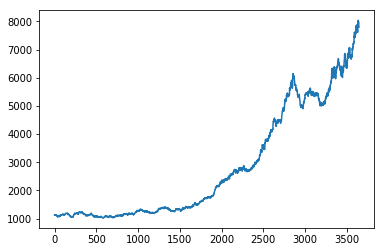

In [442]:
a = predict_change
result = []
result.append((1+a[0])*close_list[13670])
for i in range(1, len(a)):
    result.append(result[-1] * (1+a[i]))

plt.plot(result)

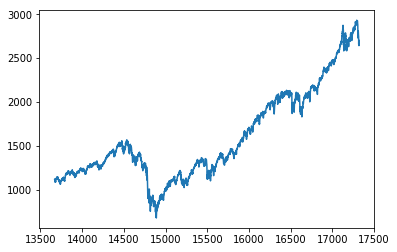

In [443]:
plt.plot(close_list[13670:17320])

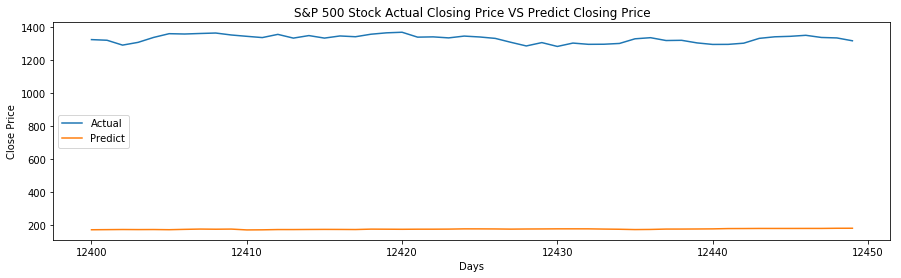

In [407]:
plt.figure(figsize=(15,4))
x = np.arange(12400,12450,1)
plt.plot(x,close_list[12400:12450],label='Actual')
plt.plot(x,result[12400:12450],label='Predict')
plt.title("S&P 500 Stock Actual Closing Price VS Predict Closing Price")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend(loc="center left")
plt.show()

In [283]:
result

[16.75811542991755,
 16.709058696113075,
 16.767926972909304,
 16.44414605418139,
 16.3558421672556,
 16.404898901060072,
 16.54226246525324,
 16.53244994110719,
 16.552074008244997,
 16.58150765606596,
 16.601130742049474,
 16.54226246525324,
 16.42452296819788,
 16.41471142520613,
 16.50301531213192,
 16.699246171967022,
 16.72867981978799,
 16.72867981978799,
 16.90528857479388,
 16.96415881389871,
 16.993592461719675,
 16.90528857479388,
 16.88566450765607,
 16.954347270906958,
 16.915100117785634,
 16.738491362779744,
 16.738491362779744,
 16.66981154299176,
 16.826796230859838,
 16.875854926972913,
 16.84641931684335,
 16.885664507656067,
 16.954347270906954,
 16.954347270906954,
 16.895476050647822,
 16.915100117785634,
 16.90528857479388,
 16.96415881389871,
 16.993592461719675,
 16.875854926972913,
 16.866043383981157,
 16.748303886925797,
 16.767926972909308,
 16.797362583038876,
 16.92491166077739,
 17.121143501766788,
 17.160388692579506,
 17.121143501766785,
 17.1113319587

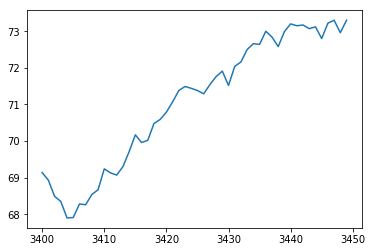

In [280]:
plt.plot(close_list[3400:3450])

In [ ]:
predict_status = []

for i in range(0,13663,1)
    

array([-45.10220161, -44.99050726, -48.82344616, ..., -44.5075676 ,
       -44.40913398, -44.59998622])

In [11]:
hidden_states[1:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
# Matrix of transition probabilities between states.
print ("Transition matrix: ", model.transmat_)

Transition matrix:  [[9.98075330e-001 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 4.22261550e-141 1.92466981e-003 0.00000000e+000
  9.90671040e-067 0.00000000e+000]
 [0.00000000e+000 8.98524380e-001 7.06630425e-095 1.38369761e-002
  1.85398772e-002 0.00000000e+000 0.00000000e+000 6.82376020e-002
  8.61164474e-004 0.00000000e+000]
 [0.00000000e+000 2.65497195e-089 9.96778824e-001 1.26333850e-003
  1.24106537e-003 1.72739029e-166 0.00000000e+000 4.12482495e-027
  2.14085716e-054 7.16771902e-004]
 [0.00000000e+000 2.74878821e-002 1.92831932e-003 8.54748095e-001
  3.96270094e-003 0.00000000e+000 0.00000000e+000 9.36231986e-002
  1.82498045e-002 0.00000000e+000]
 [0.00000000e+000 2.58525658e-002 1.91341617e-003 1.96127613e-003
  9.41848863e-001 8.71993191e-311 0.00000000e+000 2.65684721e-002
  1.85540671e-003 9.38258528e-240]
 [5.80785695e-165 0.00000000e+000 5.01411174e-203 0.00000000e+000
  0.00000000e+000 9.96820111e-001 1.72594637e-003 0.00000000e+000
  8.62874215e

In [13]:
# Mean and Covariance parameters for each state.
print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", model.covars_[i])
    print()

Means and vars of each hidden state
0th hidden state
mean =  [4.72602373e-04 2.92671076e+06]
var =  [[4.74289393e-05 2.96053876e+02]
 [2.96053876e+02 1.84524439e+12]]

1th hidden state
mean =  [8.38082347e-04 3.15058330e+09]
var =  [[ 4.16460069e-05 -1.14397925e+05]
 [-1.14397925e+05  9.82088628e+16]]

2th hidden state
mean =  [7.80030509e-05 1.18622847e+09]
var =  [[1.67064144e-04 1.15860539e+05]
 [1.15860539e+05 1.06907040e+17]]

3th hidden state
mean =  [-2.10046688e-04  4.94766835e+09]
var =  [[ 2.30307699e-04 -6.49666550e+05]
 [-6.49666550e+05  4.84318789e+17]]

4th hidden state
mean =  [3.29080856e-04 2.22169880e+09]
var =  [[5.74045147e-05 4.02392893e+04]
 [4.02392893e+04 1.54544952e+17]]

5th hidden state
mean =  [5.82085050e-04 1.15555226e+08]
var =  [[8.59436182e-05 4.34289662e+04]
 [4.34289662e+04 3.60225499e+15]]

6th hidden state
mean =  [1.78635961e-05 1.50685012e+07]
var =  [[7.10443198e-05 6.63092459e+03]
 [6.63092459e+03 3.24287585e+13]]

7th hidden state
mean =  [5.05

In [91]:
predict_diff, predict_seq = model.sample(17000, random_state=540)

In [92]:
close_list[0]

16.66

In [93]:
predict_diff_0 = predict_diff[:,0]

In [94]:
predict_diff_0

array([ 0.00034064,  0.00626487,  0.00676279, ...,  0.00304498,
       -0.00841896,  0.00288951])

In [95]:
a = predict_diff_0.tolist()
result = []
result.append((1+a[0])*close_list[0])
for i in range(1, len(a)):
    result.append(result[-1] * (1+a[i]))

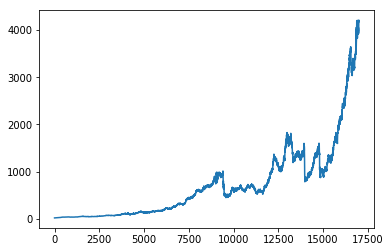

In [96]:
plt.plot(result)

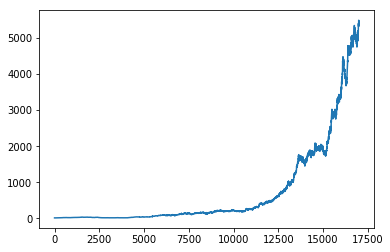

In [99]:
predict_diff, predict_seq = model.sample(17000, random_state=1)
predict_diff_0 = predict_diff[:,0]

a = predict_diff_0.tolist()
result = []
result.append((1+a[0])*close_list[0])
for i in range(1, len(a)):
    result.append(result[-1] * (1+a[i]))
    
plt.plot(result)

NameError: name 'Date' is not defined

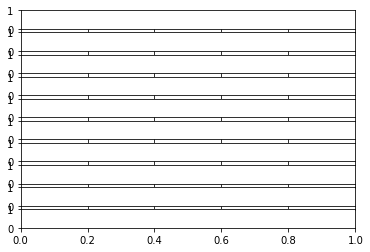

In [77]:
# 画图描述
fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True)
colours = cm.rainbow(np.linspace(0, 1, model.n_components))
for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(Date[mask], Close[mask], ".-", c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())

    ax.grid(True)

plt.show()

In [ ]:
plt.figure(figsize=(25,18))
for i in range(model.n_components):
    pos = (hidden_states == i)
    plt.plot_date(Date[pos],Close[pos],'o',label='hidden state %d'%i,lw=2)
    plt.legend(loc='upper left')